#來聊聊「回測過度最佳化」吧！
<img src="fig/overfitting_looklike.png" width=430>
reference: http://www.knewton.com/tech/blog/2014/09/online-cross-validation-predict-future-student-behavior/

#With four parameters I can fit an elephant and with five I can make him wiggle his trunk.
## -- John von Neumann

# 什麼是回測過度最佳化？
* 想想這個情況，如果有一間投資公司精準命中股票的漲跌，連續十個月，你願不願意把錢給這間公司管？
* 這間投資公司每月會寄出 1024 封信給投資人，一半預測「上漲」，一半建議「下跌」。一個月後，再針對剩下的 512 投資人發信，一半預測「上漲」，一半建議「下跌」。如此過了十個月後，就會有1個投資人全數命中。
* 這個幸運的投資人可能以為公司超神，但是他不曉得公司做了多少錯誤的預測
* 這就是回測過度最佳化：只要回測次數夠多，總能找到一個不錯的結果！
* 透過過度最佳化得到的模型，很可能毫無預測力！

# 如何檢查回測過度最佳化？
1. 取樣期間要均勻
<img src="fig/twse_index.png" width=430>

# 如何檢查回測過度最佳化？
1. 取樣期間要均勻
2. 參數穩定性檢查
<img src="fig/contour.jpg" width=430>
reference:http://pic.pimg.tw/wenschair/1342544038-2503252194_n.jpg?v=1342544039

# 如何檢查回測過度最佳化？
1. 取樣期間要均勻
2. 參數穩定性檢查
3. Hold-out 法
    * 將資料分成 in-sample & out-of-sample
    * 衡量 out-of-sample 是否仍有好的績效表現
<img src="fig/hold-out.png" width=430>

# 如何檢查回測過度最佳化？
1. 取樣期間要均勻
2. 參數穩定性檢查
3. Hold-out 法
4. 向前推進法 (walk forward analysis)
    * 時空環境改變，參數並非固定不變，需要漸進式找解
    * [R] <a href="https://4310b1a9-a-a8fb2076-s-sites.googlegroups.com/a/r-programming.org/home/files/WFA.pdf?attachauth=ANoY7cq2HO7ybe_0Di16hD-81xL8KslepAcDXvcmRpjp_i824dXxNRFIhv_K-cjYBfMF31ThLsOjX3B8qarLlN94mIfrITthsCyCDubdvNpWt5DAT48nG53N8DyE1mhfEAwN6jjOnzckoZU95GDAB-eK0n2g7ZPqWXPmHZLdmObKsdbslHCFlSVT5-Lkm0ueCN8iHNa8qw8truW0KBFsckIuluoOZtCfUQ%3D%3D&attredirects=0">quandstrat:: walk.forward</a>
<img src='fig/wfa.jpg' width=430>

# 如何檢查回測過度最佳化？
1. 取樣期間要均勻
2. 參數穩定性檢查
3. Hold-out 法
4. 向前推進法 (walk forward analysis)
5. 估計 <b>backtest overfitting 的機率</b>
    * <a href="http://www.rinfinance.com/agenda/2014/talk/MatthewBarry.pdf">The Probability of Backtest Overfitting</a> @ R Finance  2014
    * 用很簡單直覺的方式定義 backtest overfitting 的機率，很容易應用在不同類型策略上

# 直覺
* 如果沒發生 backtest overfitting ...
    * In-sample 表現好的策略，Out-of-sample 也要表現的相對好
    
* 也就是說，如果 In-sample 表現好的策略，居然輸給 Out-of-sample 大部分的策略，這就是 Backtest overfitting 了！

* 發生1次歪掉就算醜一

* 如果十次測試中有1個醜一，Prob(backtest overfitting) = 1/10 = 10%

## 等等，資料只有一份阿，哪來的十次測試？？？

#Combinational Symmetric Cross Validation
* 類似 Cross Validation
* 但是 traing & testing 切的一樣大
* 以避免資料長度不同的比較誤差
* 關於 CSCV 方法更詳細的介紹，請參考 <a href="http://nbviewer.ipython.org/format/slides/github/exilespacer/ProbabilityOfBacktestOverfitting/blob/master/Probability_of_overfitting.ipynb#/">link</a>.
* [R] pbo
<img src="fig/cross_validation.png" height=300>
* reference: http://blog.kaggle.com/2015/06/29/scikit-learn-video-7-optimizing-your-model-with-cross-validation/

In [6]:
library(pbo)

In [17]:
df <- read.csv('~/coscup_pbo/data/ret.csv', header=T)
head(df)

,Strategy0,Strategy1,Strategy2,Strategy3,Strategy4,Strategy5,Strategy6,Strategy7,Strategy8,Strategy9,Strategy10,Strategy11,Strategy12,Strategy13,Strategy14,Strategy15,Strategy16,Strategy17,Strategy18,Strategy19,Strategy20,Strategy21,Strategy22,Strategy23,Strategy24,Strategy25,Strategy26,Strategy27,Strategy28,Strategy29,Strategy30,Strategy31,Strategy32,Strategy33,Strategy34,Strategy35,Strategy36,Strategy37,Strategy38,Strategy39,Strategy40,Strategy41,Strategy42,Strategy43,Strategy44,Strategy45,Strategy46,Strategy47,Strategy48,Strategy49,Strategy50,Strategy51,Strategy52,Strategy53,Strategy54,Strategy55,Strategy56,Strategy57,Strategy58,Strategy59,Strategy60,Strategy61,Strategy62,Strategy63,Strategy64,Strategy65,Strategy66,Strategy67,Strategy68,Strategy69,Strategy70,Strategy71,Strategy72,Strategy73,Strategy74,Strategy75,Strategy76,Strategy77,Strategy78,Strategy79,Strategy80,Strategy81,Strategy82,Strategy83,Strategy84,Strategy85,Strategy86,Strategy87,Strategy88,Strategy89,Strategy90,Strategy91,Strategy92,Strategy93,Strategy94,Strategy95,Strategy96,Strategy97,Strategy98,Strategy99,Strategy100,Strategy101,Strategy102,Strategy103,Strategy104,Strategy105,Strategy106,Strategy107,Strategy108,Strategy109,Strategy110,Strategy111,Strategy112,Strategy113,Strategy114,Strategy115,Strategy116,Strategy117,Strategy118,Strategy119,Strategy120,Strategy121,Strategy122,Strategy123,Strategy124,Strategy125,Strategy126,Strategy127,Strategy128,Strategy129,Strategy130,Strategy131,Strategy132,Strategy133,Strategy134,Strategy135,Strategy136,Strategy137,Strategy138,Strategy139,Strategy140,Strategy141,Strategy142,Strategy143,Strategy144,Strategy145,Strategy146,Strategy147,Strategy148,Strategy149,Strategy150,Strategy151,Strategy152,Strategy153,Strategy154,Strategy155,Strategy156,Strategy157,Strategy158,Strategy159,Strategy160,Strategy161,Strategy162,Strategy163,Strategy164,Strategy165,Strategy166,Strategy167,Strategy168,Strategy169,Strategy170,Strategy171,Strategy172,Strategy173,Strategy174,Strategy175,Strategy176,Strategy177,Strategy178,Strategy179,Strategy180,Strategy181,Strategy182,Strategy183,Strategy184,Strategy185,Strategy186,Strategy187,Strategy188,Strategy189,Strategy190,Strategy191,Strategy192,Strategy193,Strategy194,Strategy195,Strategy196,Strategy197,Strategy198,Strategy199,Strategy200,Strategy201,Strategy202,Strategy203,Strategy204,Strategy205,Strategy206,Strategy207,Strategy208,Strategy209,Strategy210,Strategy211,Strategy212,Strategy213,Strategy214,Strategy215,Strategy216,Strategy217,Strategy218,Strategy219,Strategy220,Strategy221,Strategy222,Strategy223,Strategy224,Strategy225,Strategy226,Strategy227,Strategy228,Strategy229,Strategy230,Strategy231,Strategy232,Strategy233,Strategy234,Strategy235,Strategy236,Strategy237,Strategy238,Strategy239,Strategy240,Strategy241,Strategy242,Strategy243,Strategy244,Strategy245,Strategy246,Strategy247,Strategy248,Strategy249,Strategy250,Strategy251,Strategy252,Strategy253,Strategy254,Strategy255,Strategy256,Strategy257,Strategy258,Strategy259,Strategy260,Strategy261,Strategy262,Strategy263,Strategy264,Strategy265,Strategy266,Strategy267,Strategy268,Strategy269,Strategy270,Strategy271,Strategy272,Strategy273,Strategy274,Strategy275,Strategy276,Strategy277,Strategy278,Strategy279,Strategy280,Strategy281,Strategy282,Strategy283,Strategy284,Strategy285,Strategy286,Strategy287,Strategy288,Strategy289,Strategy290,Strategy291,Strategy292,Strategy293,Strategy294,Strategy295,Strategy296,Strategy297,Strategy298,Strategy299,Strategy300,Strategy301,Strategy302,Strategy303,Strategy304,Strategy305,Strategy306,Strategy307,Strategy308,Strategy309,Strategy310,Strategy311,Strategy312,Strategy313,Strategy314,Strategy315,Strategy316,Strategy317,Strategy318,Strategy319,Strategy320,Strategy321,Strategy322,Strategy323,Strategy324,Strategy325,Strategy326,Strategy327,Strategy328,Strategy329,Strategy330,Strategy331,Strategy332,Strategy333,Strategy334,Strategy335,Strategy336,Strategy337,Strategy338,Strategy339,Strategy340,Strategy341,Strat

In [20]:
mySharpeRatio <- function(m){
  apply(m, 2, function(x) mean(x)/sd(x))
}
p <- pbo(df,s=8,f=mySharpeRatio,threshold=0)

In [ ]:
summary(p)

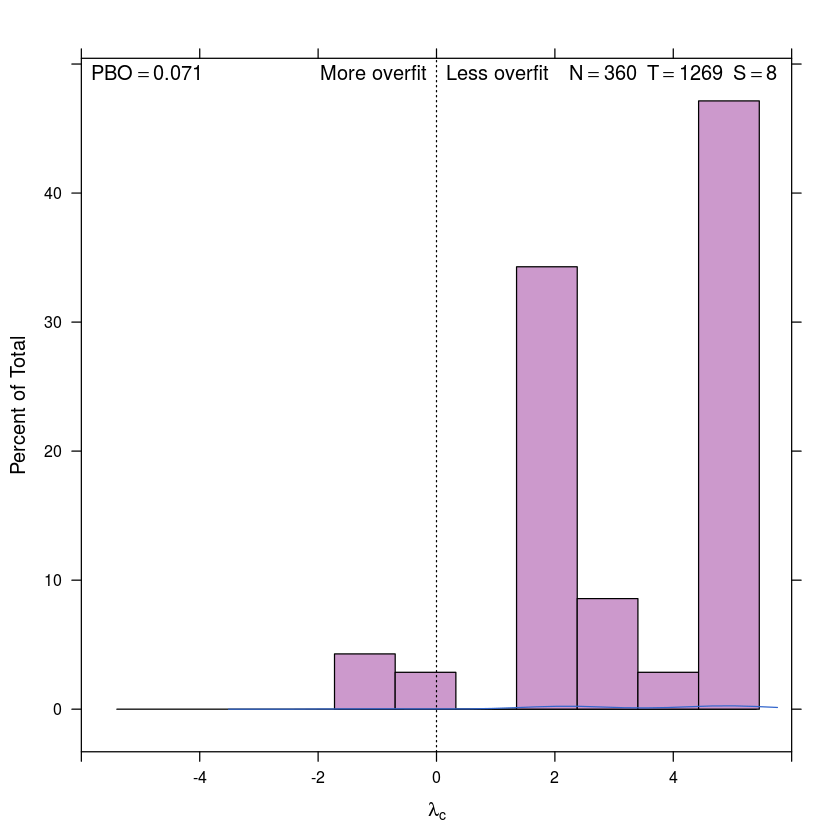

In [9]:
histogram(p)

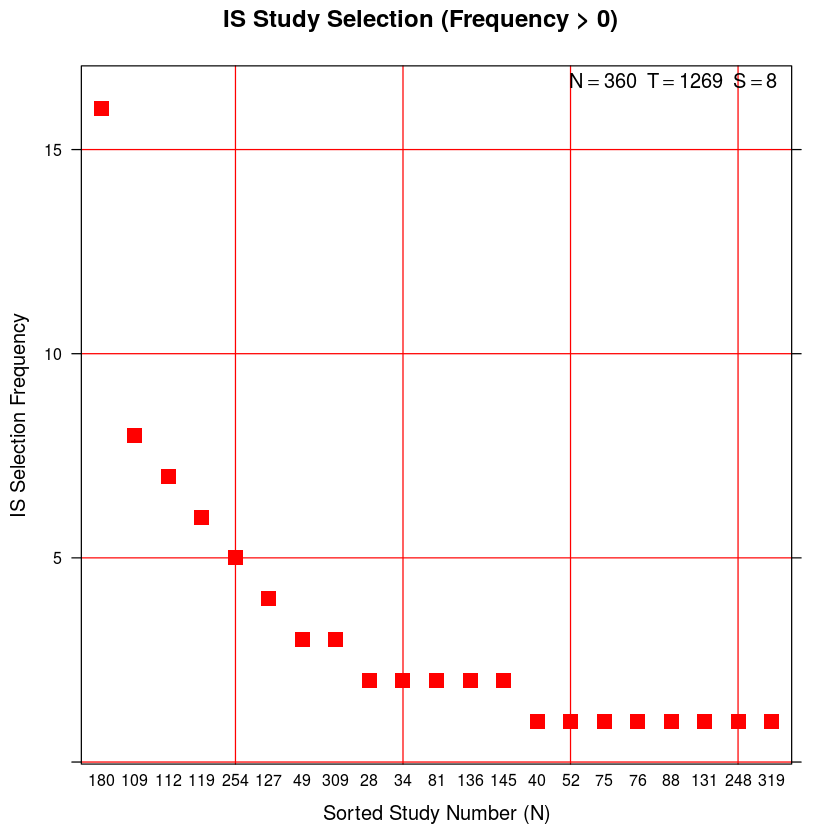

In [10]:
dotplot(p,pch=15,col=2,cex=1.5)

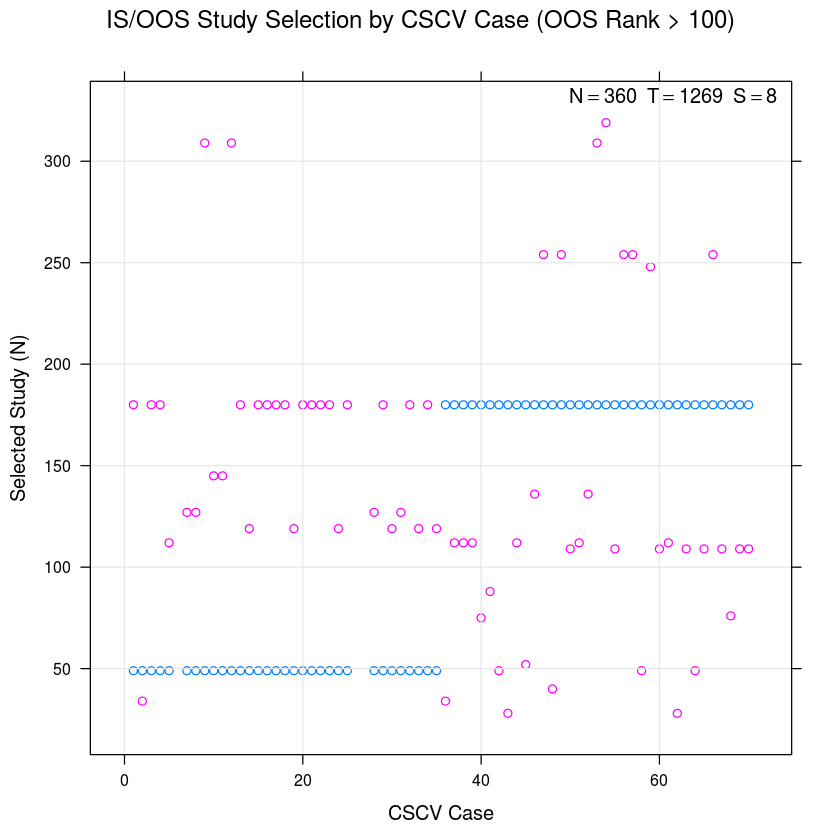

In [21]:
# The cscv type shows in-sample and out-of-sample results by CSCV iteration case (default).
xyplot(p,plotType="cscv",cex=0.8,show_rug=FALSE,osr_threshold=100)

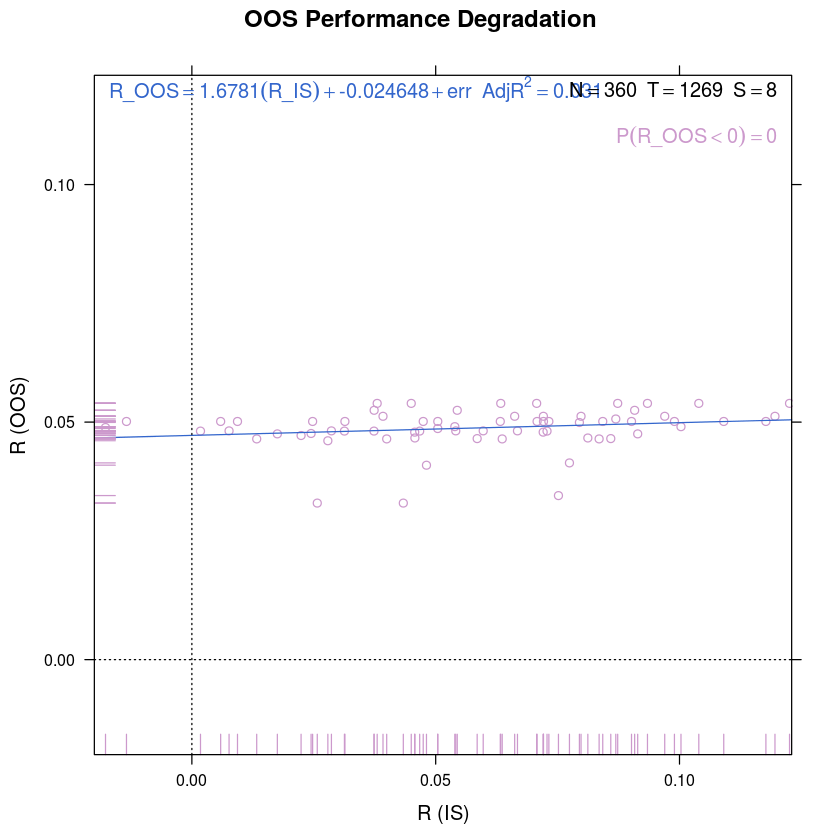

In [23]:
# The degradation type shows the performance degradation regression fit results and the probability of loss.
xyplot(p,plotType="degradation")

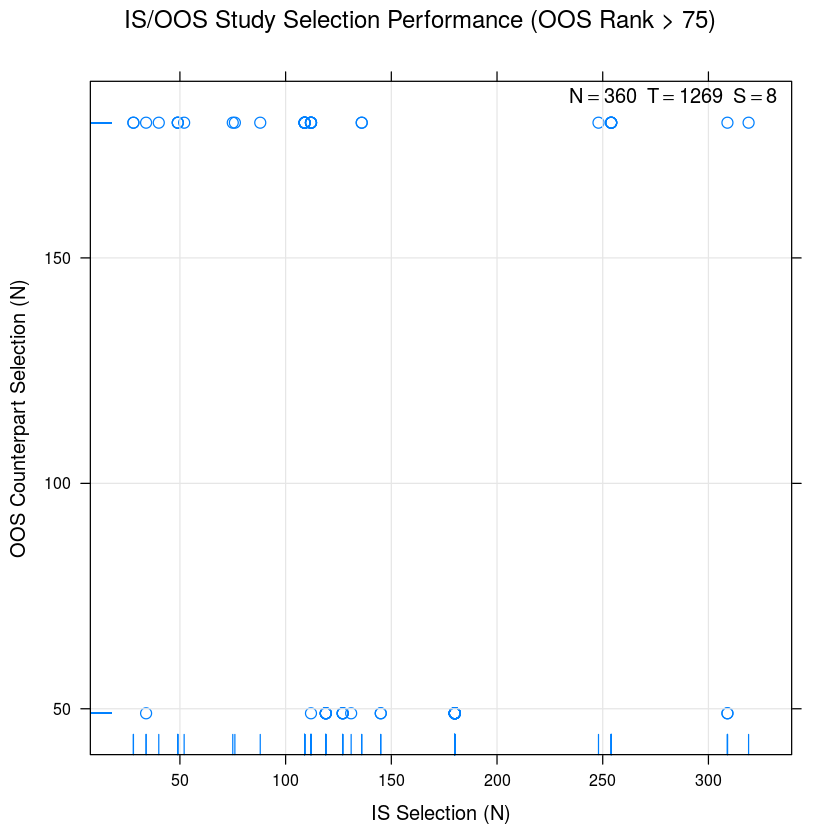

In [24]:
#The pairs type shows the in-sample and out-of-sample case selections.
xyplot(p,plotType="pairs",cex=1.1,osr_threshold=75)

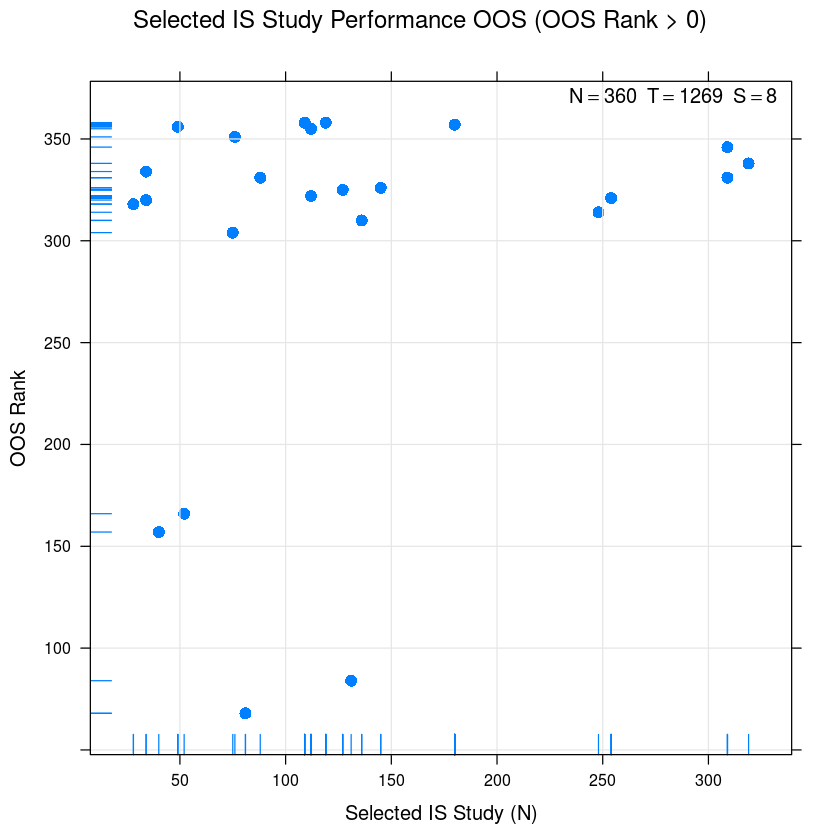

In [25]:
# The ranks type shows the sorted performance ranks results.
xyplot(p,plotType="ranks",pch=16,cex=1.2)

Thank you for your attention :)
